In [1]:
import numpy as np
import tensorflow as tf
import cv2

slim = tf.contrib.slim
from tensorflow.contrib.slim.python.slim import queues

In [2]:
import sys
sys.path.append('../')

In [3]:
from datasets import dataset_factory
from nets import nets_factory
from preprocessing import preprocessing_factory

In [4]:
isess = tf.InteractiveSession()

## Drawing routines

In [5]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """Draw a collection of lines on an image.
    """
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            
def draw_rectangle(img, p1, p2, color=[255, 0, 0], thickness=2):
    cv2.rectangle(img, p1[::-1], p2[::-1], color, thickness)
    
    
def draw_bbox(img, bbox, shape, label, color=[255, 0, 0], thickness=2):
    p1 = (int(bbox[0] * shape[0]), int(bbox[1] * shape[1]))
    p2 = (int(bbox[2] * shape[0]), int(bbox[3] * shape[1]))
    cv2.rectangle(img, p1[::-1], p2[::-1], color, thickness)
    p1 = (p1[0]+15, p1[1])
    cv2.putText(img, str(label), p1[::-1], cv2.FONT_HERSHEY_DUPLEX, 0.5, color, 1)
    

## Pascal VOC dataset

Check the data pipeline and TFRecords files.

In [12]:
from datasets import pascalvoc_2007
from datasets import pascalvoc_2012

DATASET_DIR = '/media/paul/DataExt4/PascalVOC/dataset/'
SPLIT_NAME = 'train'
BATCH_SIZE = 16

# Dataset provider loading data from the dataset.
dataset = pascalvoc_2012.get_split(SPLIT_NAME, DATASET_DIR)
provider = slim.dataset_data_provider.DatasetDataProvider(dataset, shuffle=False,
                                                          common_queue_capacity=2 * BATCH_SIZE,
                                                          common_queue_min=BATCH_SIZE)
[image, shape, bbox, label] = provider.get(['image', 'shape', 'object/bbox', 'object/label'])
print('Dataset:', dataset.data_sources)

Dataset: /media/paul/DataExt4/PascalVOC/dataset/voc_2012_train.tfrecord


In [15]:
# Problem: image shape is not fully defined => random crop with deterministic size.
xy = tf.random_uniform((2, ), minval=0, maxval=shape[0] // 3, dtype=tf.int64)
image_crop = tf.slice(image, [0, 0, 0], [200, 200, 3])

print(image.get_shape())
print(image_crop.get_shape())
print(bbox.get_shape())
print(label.get_shape())

(?, ?, 3)
(200, 200, 3)
(?, 4)
(?,)


In [18]:
# Read records from the queue.
with tf.Session() as sess:
#     with queues.QueueRunners(sess):
    # Start populating the filename queue.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    result = sess.run([image_crop, shape, bbox, label])
    result = sess.run([image_crop, shape, bbox, label])
#     result = sess.run([image_crop, shape, bbox, label])
    
    # Request threads to stop. Just to avoid error messages
    coord.request_stop()
    coord.join(threads)


(200, 200, 3)
[281 500   3]
[[ 0.27758008  0.208       0.65124553  0.75      ]
 [ 0.31316727  0.266       0.43772241  0.39399999]
 [ 0.64056939  0.38999999  0.81494659  0.426     ]
 [ 0.67259789  0.052       0.84697509  0.088     ]]
[8 8 1 1]


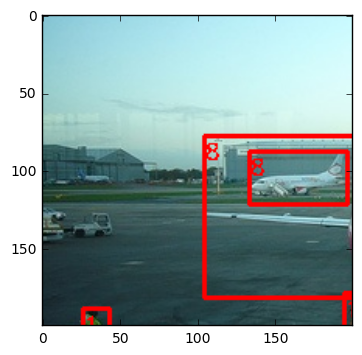

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = result[0]
img_shape = result[1]
bboxes = result[2]
for i in range(bboxes.shape[0]):
    draw_bbox(img, bboxes[i], img_shape, result[3][i], color=[255, 0, 0])

print(img.shape)
print(img_shape)
print(bboxes)
print(result[3])

plt.imshow(img)

In [10]:
images = tf.train.batch(
                [image2],
                batch_size=BATCH_SIZE,
                num_threads=1,
                capacity=5 * BATCH_SIZE)

NameError: name 'image2' is not defined

In [ ]:
# images.eval()

In [ ]:


a = tf.constant(5.0)
b = tf.constant(7.0)
c = a * b
# We can just use 'c.eval()' without passing 'sess'
print(c.eval())


In [ ]:
sess.close()